#### Tests

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

from utils import (
    make_dir_for_filename,
    load_from_json,
    write_to_json
)

In [5]:
X = np.load(os.path.join("datasets/example_dataset", "trainX.npy"))
y = np.load(os.path.join("datasets/example_dataset", "trainY.npy"))

In [6]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9999999999957802

In [80]:
def get_data(config_name):
    filename = os.path.join("runs", config_name, "train_val.json")
    train_val = load_from_json(filename)
    
    epochs = sorted(train_val.keys())
    train_loss = []
    val_loss = []
    for epoch in epochs:
        train_loss.append(train_val[epoch]["train"])
        val_loss.append(train_val[epoch]["val"])
    
    data = {
        "config_name": config_name,
        "epochs": epochs,
        "train_loss": train_loss,
        "val_loss": val_loss
    }
    return data

In [81]:
def plot_data(data):
    fig = plt.figure()
    plt.title("train val progress")
    plt.plot(data["epochs"], data["train_loss"], label="train")
    plt.plot(data["epochs"], data["val_loss"], label="val")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
    plt.show()

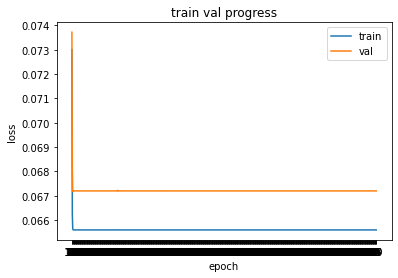

In [82]:
data = get_data(config_name="example_model_gd")
plot_data(data)

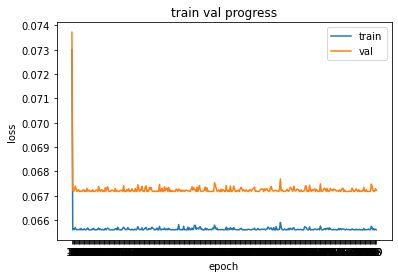

In [83]:
data = get_data(config_name="example_model_sgd")
plot_data(data)